<a href="https://colab.research.google.com/github/utyabia/1-notebook/blob/main/ML_Zoomcamp_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/car_fuel_efficiency.csv')

# Use only the specified columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

print(df.head())
print(f"Dataset shape: {df.shape}")
print(df.info())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  
Dataset shape: (9704, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_m

Missing values:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


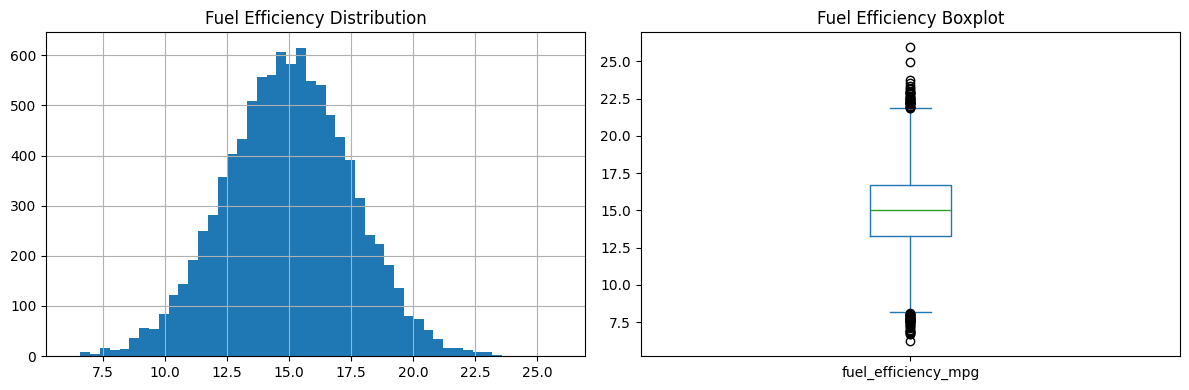

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Look at fuel_efficiency_mpg distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['fuel_efficiency_mpg'].hist(bins=50)
plt.title('Fuel Efficiency Distribution')

plt.subplot(1, 2, 2)
df['fuel_efficiency_mpg'].plot(kind='box')
plt.title('Fuel Efficiency Boxplot')
plt.tight_layout()
plt.show()

In [4]:
# Calculate median horsepower
median_hp = df['horsepower'].median()
print(f"Median horsepower: {median_hp}")

# Check percentiles
print("Horsepower percentiles:")
print(df['horsepower'].describe())

Median horsepower: 149.0
Horsepower percentiles:
count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64


In [5]:
def prepare_X(df, fill_value=0):
    df = df.copy()
    if fill_value == 'mean':
        # Calculate mean from training data only (will be handled separately)
        df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    else:
        df['horsepower'] = df['horsepower'].fillna(fill_value)
    return df.values

def train_linear_regression(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

def train_linear_regression_regularized(X, y, r=0.0):
    lr = Ridge(alpha=r)
    lr.fit(X, y)
    return lr

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Shuffle and split the dataset
np.random.seed(42)
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx].reset_index(drop=True)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [6]:
# Option 1: Fill with 0
X_train_0 = prepare_X(df_train, fill_value=0)
X_val_0 = prepare_X(df_val, fill_value=0)

lr_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = lr_0.predict(X_val_0)
rmse_0 = rmse(y_val, y_pred_0)

# Option 2: Fill with mean (using training mean)
train_hp_mean = df_train['horsepower'].mean()
X_train_mean = prepare_X(df_train, fill_value=train_hp_mean)
X_val_mean = prepare_X(df_val, fill_value=train_hp_mean)

lr_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = lr_mean.predict(X_val_mean)
rmse_mean = rmse(y_val, y_pred_mean)

print(f"RMSE with 0: {round(rmse_0, 2)}")
print(f"RMSE with mean: {round(rmse_mean, 2)}")

RMSE with 0: 0.52
RMSE with mean: 0.46


In [7]:
# Fill with 0 and try different regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

X_train = prepare_X(df_train, fill_value=0)
X_val = prepare_X(df_val, fill_value=0)

for r in r_values:
    lr = train_linear_regression_regularized(X_train, y_train, r)
    y_pred = lr.predict(X_val)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f"r={r}, RMSE={round(score, 2)}")

best_idx = np.argmin(rmse_scores)
best_r = r_values[best_idx]
print(f"Best r: {best_r}")

r=0, RMSE=0.52
r=0.01, RMSE=0.52
r=0.1, RMSE=0.52
r=1, RMSE=0.52
r=5, RMSE=0.52
r=10, RMSE=0.52
r=100, RMSE=0.52
Best r: 0


In [8]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_seeds = []

for seed in seeds:
    np.random.seed(seed)
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].reset_index(drop=True)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, fill_value=0)
    X_val = prepare_X(df_val, fill_value=0)

    lr = train_linear_regression(X_train, y_train)
    y_pred = lr.predict(X_val)
    score = rmse(y_val, y_pred)
    rmse_scores_seeds.append(score)

std_rmse = np.std(rmse_scores_seeds)
print(f"RMSE scores across seeds: {[round(s, 3) for s in rmse_scores_seeds]}")
print(f"Standard deviation: {round(std_rmse, 3)}")

RMSE scores across seeds: [np.float64(0.521), np.float64(0.521), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.528), np.float64(0.531), np.float64(0.509), np.float64(0.515), np.float64(0.513)]
Standard deviation: 0.007


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')

# Use only the specified columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

def prepare_X(df, fill_value=0):
    df = df.copy()
    df['horsepower'] = df['horsepower'].fillna(fill_value)
    return df.values

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Question 6: Split with seed 9, combine train+val, test with r=0.001
np.random.seed(9)
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f"Total samples: {n}")
print(f"Train samples: {n_train}")
print(f"Validation samples: {n_val}")
print(f"Test samples: {n_test}")

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

# Split into train+val and test
df_train_val = df_shuffled.iloc[:n_train+n_val].copy()
df_test_final = df_shuffled.iloc[n_train+n_val:].copy()

print(f"Train+val shape: {df_train_val.shape}")
print(f"Test shape: {df_test_final.shape}")

# Prepare features and target
y_train_val = df_train_val['fuel_efficiency_mpg'].values
y_test_final = df_test_final['fuel_efficiency_mpg'].values

del df_train_val['fuel_efficiency_mpg']
del df_test_final['fuel_efficiency_mpg']

# Fill missing values with 0
X_train_val = prepare_X(df_train_val, fill_value=0)
X_test_final = prepare_X(df_test_final, fill_value=0)

# Train with r=0.001
lr_final = Ridge(alpha=0.001)
lr_final.fit(X_train_val, y_train_val)

# Predict and calculate RMSE
y_pred_final = lr_final.predict(X_test_final)
final_rmse = rmse(y_test_final, y_pred_final)

print(f"\nFinal test RMSE: {final_rmse:.3f}")
print(f"Rounded to 2 decimal places: {round(final_rmse, 2)}")

# Let's also check the scale of the target variable to understand the RMSE
print(f"\nTarget variable statistics:")
print(f"Mean fuel efficiency: {df['fuel_efficiency_mpg'].mean():.2f}")
print(f"Std fuel efficiency: {df['fuel_efficiency_mpg'].std():.2f}")
print(f"Min fuel efficiency: {df['fuel_efficiency_mpg'].min():.2f}")
print(f"Max fuel efficiency: {df['fuel_efficiency_mpg'].max():.2f}")

# Let's also check what the RMSE would be without regularization for comparison
lr_no_reg = Ridge(alpha=0)
lr_no_reg.fit(X_train_val, y_train_val)
y_pred_no_reg = lr_no_reg.predict(X_test_final)
rmse_no_reg = rmse(y_test_final, y_pred_no_reg)
print(f"\nRMSE without regularization: {rmse_no_reg:.3f}")

Total samples: 9704
Train samples: 5824
Validation samples: 1940
Test samples: 1940
Train+val shape: (7764, 5)
Test shape: (1940, 5)

Final test RMSE: 0.516
Rounded to 2 decimal places: 0.52

Target variable statistics:
Mean fuel efficiency: 14.99
Std fuel efficiency: 2.56
Min fuel efficiency: 6.20
Max fuel efficiency: 25.97

RMSE without regularization: 0.516
